#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('C:\\Users\\youss\\Desktop\\Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [29]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [30]:
#1- Basic Data Exploration

# Identify the number of rows and columns in the dataset
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Determine the data types of each column
data_types = df.dtypes
print("\nData types of each column:")
print(data_types)

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)


Number of rows: 148654
Number of columns: 13

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [31]:
#2- Descriptive Statistics

# Calculate basic statistics
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode()
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
salary_range = max_salary - min_salary
std_dev_salary = df['TotalPay'].std()

# Print the calculated statistics
print("Mean salary:", mean_salary)
print("Median salary:", median_salary)
print("Mode salary:", mode_salary)
print("Minimum salary:", min_salary)
print("Maximum salary:", max_salary)
print("Salary Range:", salary_range)
print("Standard Deviation of salary:", std_dev_salary)


Mean salary: 74768.321971703
Median salary: 71426.60999999999
Mode salary: 0    0.0
Name: TotalPay, dtype: float64
Minimum salary: -618.13
Maximum salary: 567595.43
Salary Range: 568213.56
Standard Deviation of salary: 50517.005273949944


In [32]:
#3- Data Cleaning

# we will retrive with basepay,benfits,OvertimePay and OtherPay data by replacing missing values with the mean salary. We'll use this approach because it's a simple method that can help preserve the overall distribution of the data
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)
df['OvertimePay'].fillna(df['OvertimePay'].mean(), inplace=True)
df['OtherPay'].fillna(df['OtherPay'].mean(), inplace=True)

# we will drop the notes and status columns because they are empty so that helps reduce unnecessary features that do not contribute meaningful information to the analysis
df.dropna(axis=1, how='all', inplace=True)

# Check for missing values in each column
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)



Missing values in each column:
Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


# Good Luck!

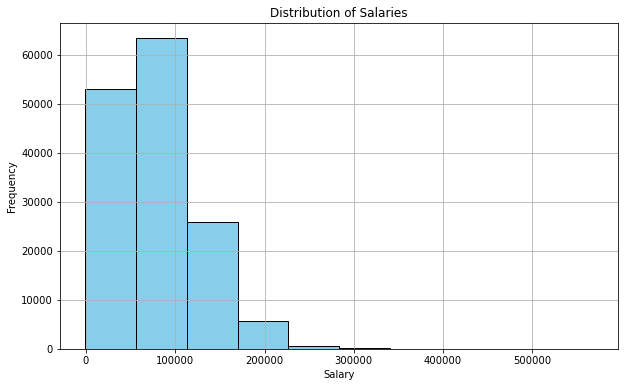

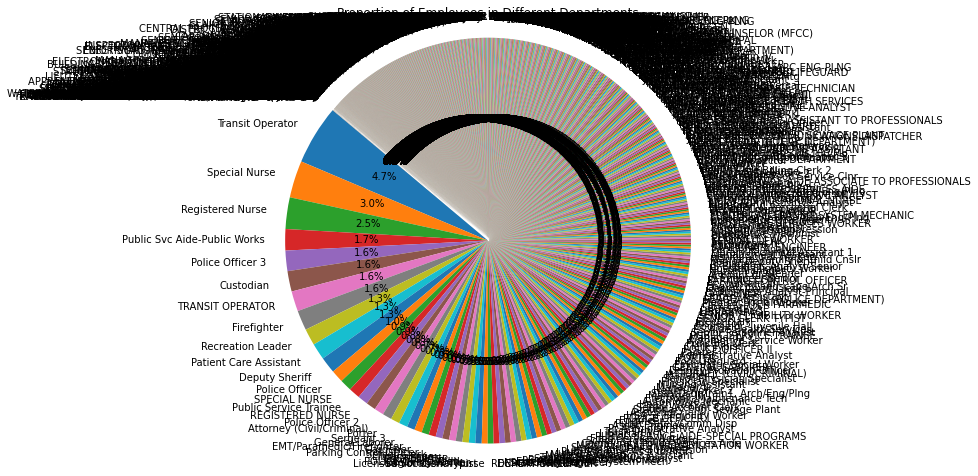

In [33]:
#4- Basic Data Visualization

#Create a histogram to visualize the distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a pie chart to represent the proportion of employees in different departments
department_counts = df['JobTitle'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Different Departments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [34]:
#5- Grouped Analysis

# Group the data by one or more columns and calculate summary statistics for each group
grouped_data = df.groupby(['Year', 'JobTitle'])

# Calculate summary statistics (e.g., mean) for each group
summary_stats = grouped_data['TotalPay'].agg(['mean', 'median', 'min', 'max', 'std'])

# Compare the average salaries across different groups
average_salaries = summary_stats.sort_values(by='mean', ascending=False)

# Display the summary statistics
print(average_salaries)


                                                           mean      median  \
Year JobTitle                                                                 
2011 GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  399211.275  399211.275   
2014 Chief Investment Officer                        339653.700  339653.700   
2013 Chief of Police                                 339282.070  339282.070   
     Chief, Fire Department                          336922.010  336922.010   
2014 Chief of Police                                 326716.760  326716.760   
...                                                         ...         ...   
2013 Public Safety Comm Tech                              0.000       0.000   
     IS Operator-Journey                                  0.000       0.000   
     Drug Court Coordinator                               0.000       0.000   
2014 Special Assistant 15                                 0.000       0.000   
     Not provided                                   

Correlation between Salary and the year of hire: 0.03209039798559044


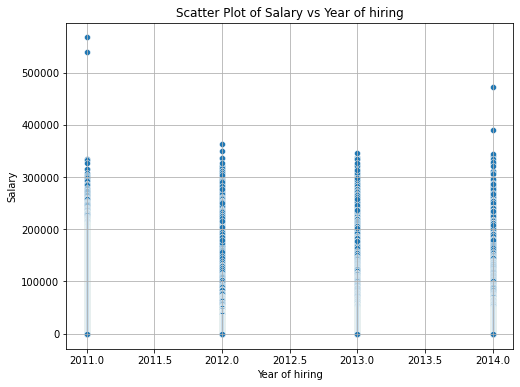

In [35]:
#6- Simple Correlation Analysis

# Calculate the correlation coefficient between 'Salary' and another numerical column (e.g., 'Years_Experience')
correlation = df['TotalPay'].corr(df['Year'])
print("Correlation between Salary and the year of hire:", correlation)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year', y='TotalPay',data=df)
plt.title('Scatter Plot of Salary vs Year of hiring')
plt.xlabel('Year of hiring')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [36]:
#7- Summary of Insights
#there is almost no linear relationship between salary and year of hiring
#the salary 100000 is the most salary paid
#the Mean salary: 74768.321971703
#the max salary: 567595.43
#the Salary Range: 568213.56
#transit operator is the most JobTitle exist
# the mean salary of 2011 GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY is 399211.275
#and the minimum salary is 230827.12
#and the maximum salary is 567595.43
#and standard deciasion is 238131.15569